In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ideal_df = pd.read_csv('ideal.csv')


In [90]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
ideal_df=pd.read_csv('ideal.csv')

In [91]:
train_df

,x,y1,y2,y3,y4
0,-20.0,-45.292340,-15999.796,99.529580,899.827500
1,-19.9,-44.364960,-15761.017,99.895670,893.427400
2,-19.8,-44.565968,-15524.681,98.855780,887.160460
3,-19.7,-44.762450,-15290.500,98.126100,881.448700
4,-19.6,-44.188698,-15058.586,97.511475,875.377260
...,...,...,...,...,...
395,19.5,34.150510,14829.701,97.719000,89.044914
396,19.6,33.875698,15058.578,98.092850,91.522880
397,19.7,33.952816,15291.142,98.500720,93.639630
398,19.8,34.517270,15524.978,99.343155,95.835785


In [92]:
ideal_df

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y41,y42,y43,y44,y45,y46,y47,y48,y49,y50
0,-20.0,-0.912945,0.408082,9.087055,5.408082,-9.087055,0.912945,-0.839071,-0.850919,0.816164,...,-40.456474,40.204040,2.995732,-0.008333,12.995732,5.298317,-5.298317,-0.186278,0.912945,0.396850
1,-19.9,-0.867644,0.497186,9.132356,5.497186,-9.132356,0.867644,-0.865213,0.168518,0.994372,...,-40.233820,40.048590,2.990720,-0.008340,12.990720,5.293305,-5.293305,-0.215690,0.867644,0.476954
2,-19.8,-0.813674,0.581322,9.186326,5.581322,-9.186326,0.813674,-0.889191,0.612391,1.162644,...,-40.006836,39.890660,2.985682,-0.008347,12.985682,5.288267,-5.288267,-0.236503,0.813674,0.549129
3,-19.7,-0.751573,0.659649,9.248426,5.659649,-9.248426,0.751573,-0.910947,-0.994669,1.319299,...,-39.775787,39.729824,2.980619,-0.008354,12.980619,5.283204,-5.283204,-0.247887,0.751573,0.612840
4,-19.6,-0.681964,0.731386,9.318036,5.731386,-9.318036,0.681964,-0.930426,0.774356,1.462772,...,-39.540980,39.565693,2.975530,-0.008361,12.975530,5.278115,-5.278115,-0.249389,0.681964,0.667902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,19.5,0.605540,0.795815,10.605540,5.795815,-10.605540,-0.605540,-0.947580,-0.117020,1.591630,...,39.302770,-38.602093,2.970414,-0.012422,12.970414,5.273000,-5.273000,0.240949,0.605540,0.714434
396,19.6,0.681964,0.731386,10.681964,5.731386,-10.681964,-0.681964,-0.930426,0.774356,1.462772,...,39.540980,-38.834310,2.975530,-0.012438,12.975530,5.278115,-5.278115,0.249389,0.681964,0.667902
397,19.7,0.751573,0.659649,10.751574,5.659649,-10.751574,-0.751573,-0.910947,-0.994669,1.319299,...,39.775787,-39.070175,2.980619,-0.012453,12.980619,5.283204,-5.283204,0.247887,0.751573,0.612840
398,19.8,0.813674,0.581322,10.813674,5.581322,-10.813674,-0.813674,-0.889191,0.612391,1.162644,...,40.006836,-39.309338,2.985682,-0.012469,12.985682,5.288267,-5.288267,0.236503,0.813674,0.549129


In [93]:
test_df

,x,y
0,-13.1,-4494.980000
1,3.4,78.957020
2,11.1,2.493696
3,1.9,-7730.091300
4,-14.0,13840.699000
...,...,...
95,18.8,3417.366500
96,14.7,73.494940
97,13.2,5111.822800
98,-17.5,755.190500


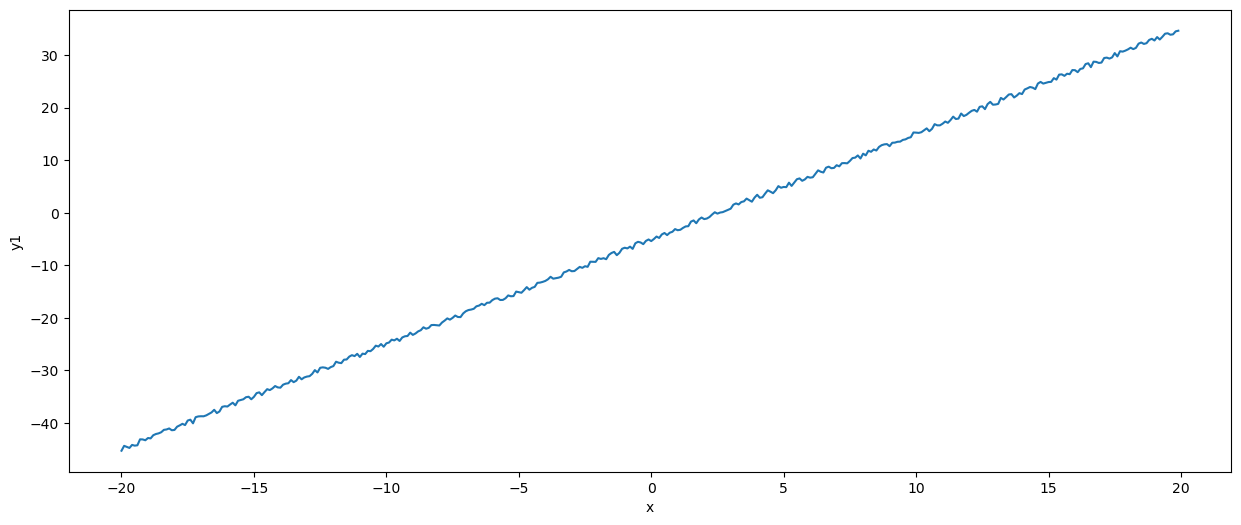

In [94]:
plt.figure(figsize=(15,6))
sns.lineplot(x=train_df['x'],y=train_df['y1'],data=train_df)
plt.show()

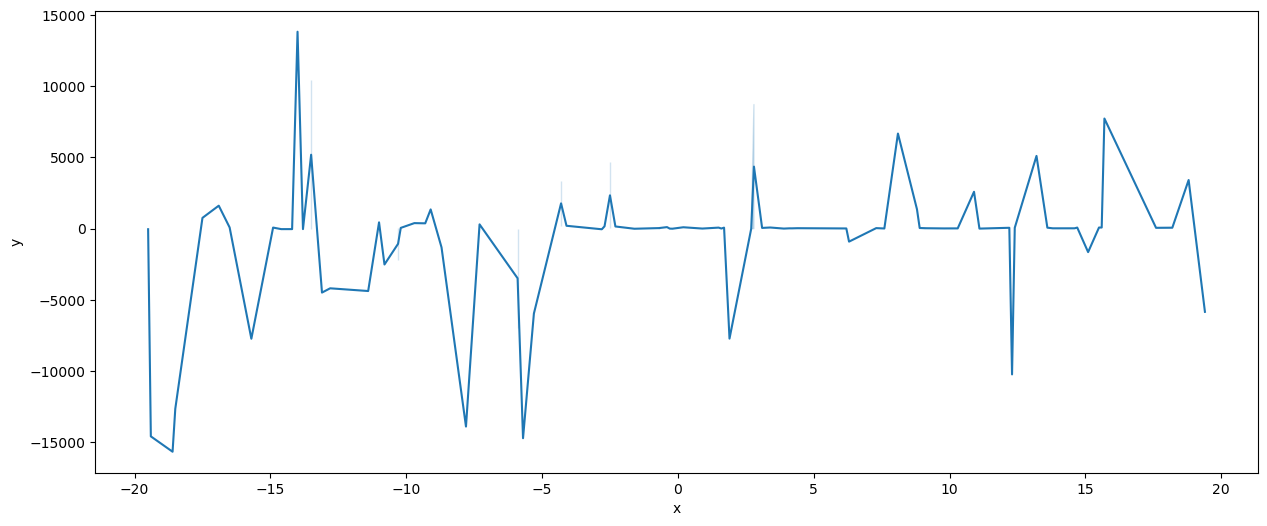

In [95]:
plt.figure(figsize=(15,6))
sns.lineplot(x=test_df['x'],y=test_df['y'],data=test_df)
plt.show()

In [96]:
# Define the features and target
X_train = train_df[['x']]
y_train = train_df['y1']
X_test = test_df[['x']]
y_test = test_df['y']


In [97]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
# Fit the ridge regression model
ridge = Ridge(alpha=1)  # Choose a value for alpha
ridge.fit(X_train_scaled, y_train)


Ridge(alpha=1)

In [99]:
# Predict the target values for the test set
y_pred = ridge.predict(X_test_scaled)


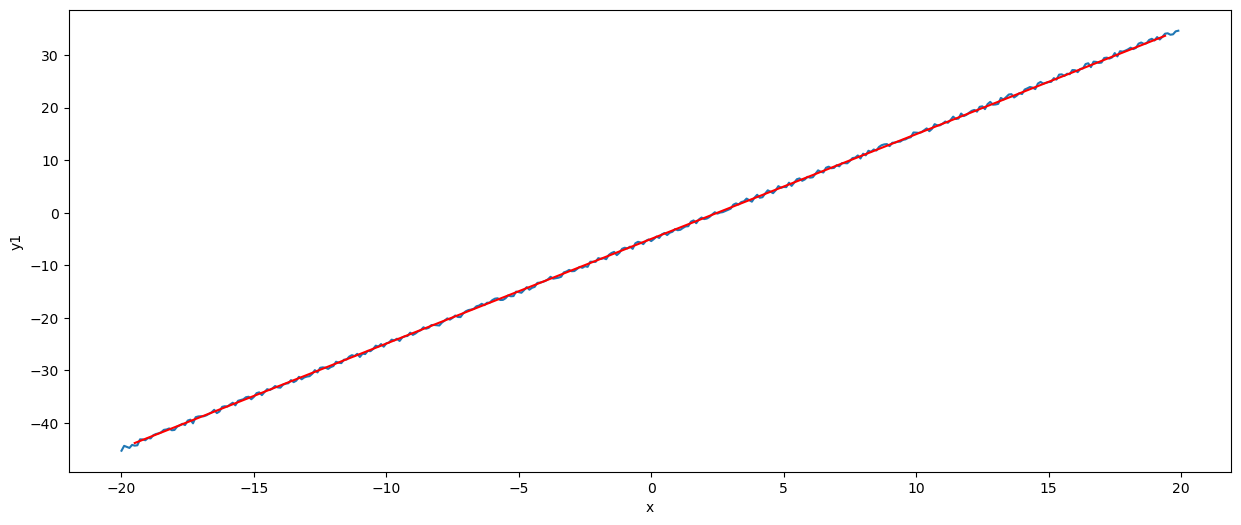

In [100]:
# Plot the results
plt.figure(figsize=(15,6))
sns.lineplot(x=train_df['x'], y=train_df['y1'], data=train_df)
sns.lineplot(x=test_df['x'], y=y_pred, color='red')
plt.show()
